# nlp1

Use the "Run" button to execute the code.

In [1]:
#importing the required libraries and modules
!pip3 install nltk
import nltk
nltk.download('stopwords')
!pip install textblob
!pip install wordcloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(set(stopwords.words('english')))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

     |████████████████████████████████| 1.5 MB 13.7 MB/s            
     |████████████████████████████████| 773 kB 59.7 MB/s            


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     |████████████████████████████████| 636 kB 13.7 MB/s            
     |████████████████████████████████| 513 kB 9.2 MB/s            


In [2]:
#uploading the dataset
df=pd.read_csv('Tweets.csv')

In [3]:
#reading the first five lines
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
#looking at the details in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
#looking at the different columns of the dataset
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [6]:
#dropping the unnecessary columns
text_df=df.drop(['selected_text', 'sentiment'], axis=1)

In [7]:
#looking at the remained columns
text_df.head()

,textID,text
0,cb774db0d1,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...
3,9642c003ef,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t..."


In [8]:
#printing the first 5 lines of text
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

 I`d have responded, if I were going 

 Sooo SAD I will miss you here in San Diego!!! 

my boss is bullying me... 

 what interview! leave me alone 

 Sons of ****, why couldn`t they put them on the releases we already bought 



In [9]:
#looking at the details
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textID  27481 non-null  object
 1   text    27480 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


In [10]:
#defining the function for the preprocessing of data
import nltk
nltk.download('punkt')
def data_preprocessing(text):
    #converting the text into lowercase
    text=str(text).lower()
    #removing URLs and links
    text=re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    #removing the mentions and hashtags
    text=re.sub(r'\@w+|\#*','',text)
    #removing the non-alphanumeric characters
    text=re.sub(r'[^\w\s]','',text)
    #splitting the sentences into words
    text_tokens=word_tokenize(text)
    #creating a set of stopwords
    stop_words=set(stopwords.words('english'))
    #removing stopwords from the text
    filtered_text=[w for w in text_tokens if not w in stop_words]
    #removing numeric tokens from the filtered text
    filtered_text=[token for token in filtered_text if not str(token).isnumeric()]
    #joining the filtered text in a string
    return " ".join(filtered_text)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
#applying the preprocessing function on the modified dataset
text_df.text=text_df['text'].apply(data_preprocessing)

In [12]:
#removing the duplicate rows
text_df=text_df.drop_duplicates('text')

In [13]:
#defining the function for stemming the text
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data

In [14]:
#checking the columns
text_df.columns

Index(['textID', 'text'], dtype='object')

In [15]:
#checking for the missing values
text_df['text'].isnull().sum()

0

In [16]:
#applying the stemming function for converting the words into their root form
text_df['text']=text_df['text'].apply(lambda x:stemming(x))

In [17]:
#checking the first five lines of the stemmed data
text_df.head()

,textID,text
0,cb774db0d1,id responded going
1,549e992a42,sooo sad miss san diego
2,088c60f138,boss bullying
3,9642c003ef,interview leave alone
4,358bd9e861,sons couldnt put releases already bought


In [19]:
#printing the first 5 lines of the stemmed data
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

id responded going 

sooo sad miss san diego 

boss bullying 

interview leave alone 

sons couldnt put releases already bought 



In [18]:
#checking the details of the stemmed data
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26904 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textID  26904 non-null  object
 1   text    26904 non-null  object
dtypes: object(2)
memory usage: 630.6+ KB


In [19]:
#defining the funciton for the getting the polarity of each text
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
#applying the polarity funciton and creating a column 'polarity'
text_df['polarity']=text_df['text'].apply(polarity)

In [21]:
#looking at the first 15 lines of the stemmed data and their polarity
text_df.head(15)

,textID,text,polarity
0,cb774db0d1,id responded going,0.00
1,549e992a42,sooo sad miss san diego,-0.50
2,088c60f138,boss bullying,0.00
3,9642c003ef,interview leave alone,0.00
4,358bd9e861,sons couldnt put releases already bought,0.00
5,28b57f3990,httpwwwdothebouncycomsmf shameless plugging be...,1.00
6,6e0c6d75b1,2am feedings baby fun smiles coos,0.30
7,50e14c0bb8,soooo high,0.16
8,e050245fbd,,0.00
9,fc2cbefa9d,journey wow u became cooler hehe possible,0.05


In [22]:
#defining a function 'sentiment' with argument label to classify the sentiments as negative, positive, or neutral
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [23]:
#applying the sentiment function and creating a column 'sentiment'
text_df['sentiment']=text_df['polarity'].apply(sentiment)

In [24]:
#looking at the first 5 lines for the data along with the polarity and sentiment
text_df.head()

,textID,text,polarity,sentiment
0,cb774db0d1,id responded going,0.0,Neutral
1,549e992a42,sooo sad miss san diego,-0.5,Negative
2,088c60f138,boss bullying,0.0,Neutral
3,9642c003ef,interview leave alone,0.0,Neutral
4,358bd9e861,sons couldnt put releases already bought,0.0,Neutral


No handles with labels found to put in legend.


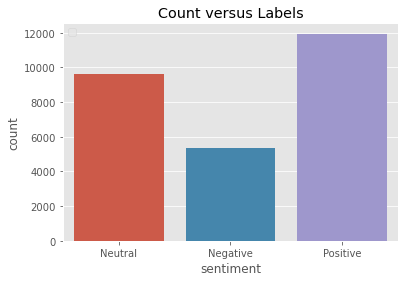

In [26]:
#plotting the negative, positive, and neutral sentiments in the form of bargraph
fig=plt.figure(figsize=(6,4))
sns.countplot(x='sentiment',data=text_df)
plt.title('Count versus Labels')


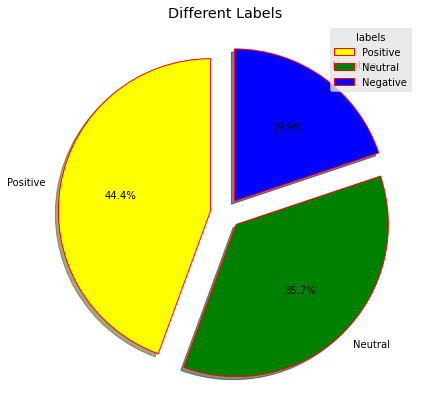

In [27]:
#plotting the type of sentiment in the form of pie chart
fig=plt.figure(figsize=(7,7))
colors=("yellow","green","blue")
wp={'linewidth':1,'edgecolor':'red'}
tags=text_df['sentiment'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Different Labels")
plt.legend(title="labels")

In [28]:
#sorting the positive tweets in the ascending order
pos_tweets = text_df[text_df['sentiment'] == 'Positive']
pos_tweets = pos_tweets.sort_values(by='polarity', ascending=False)
pos_tweets.head()

,textID,text,polarity,sentiment
5,28b57f3990,httpwwwdothebouncycomsmf shameless plugging be...,1.0,Positive
973,6be832d308,heading hollywood studios today manta kraken a...,1.0,Positive
21760,dd25e39cf5,listening best days life kellie pickler,1.0,Positive
21767,7bfb2d66df,prom awesome,1.0,Positive
21850,49c7f7399c,perfect moments broke one tiles floor hallway ...,1.0,Positive


Text(0.5, 1.0, 'Frequently occuring words in the positive tweets')

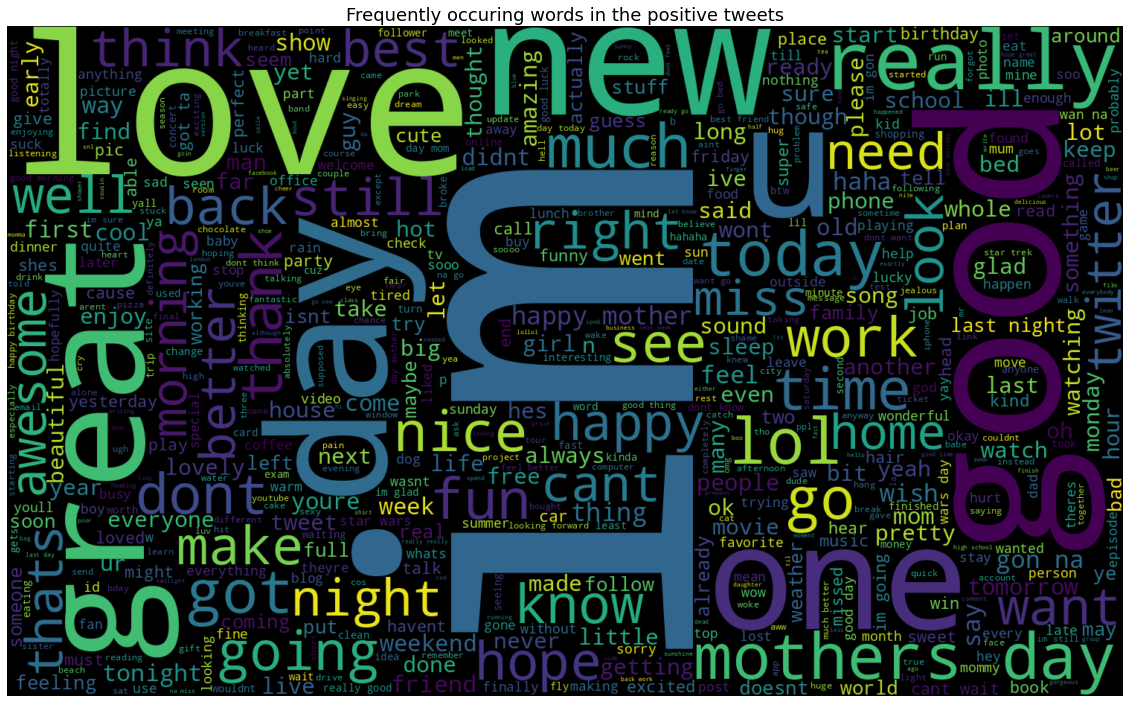

In [29]:
#creating a wordcloud for the positive tweets
text=''.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=600,width=1500,height=900).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Frequently occuring words in the positive tweets',fontsize=18)

In [30]:
#sorting the negative tweets in the descending order of polarity
neg_tweets=text_df[text_df.sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['polarity'],ascending='False')
neg_tweets.head()

,textID,text,polarity,sentiment
16708,bb8db67074,exams worst mahn go,-1.0,Negative
14691,dceade7e18,worst day evergraduation,-1.0,Negative
1760,b809700a90,cant sleep feening cigs im horrible x,-1.0,Negative
717,9d30f19fe0,terrible headache need relief,-1.0,Negative
7247,a41320f217,official im worst day called mile away,-1.0,Negative


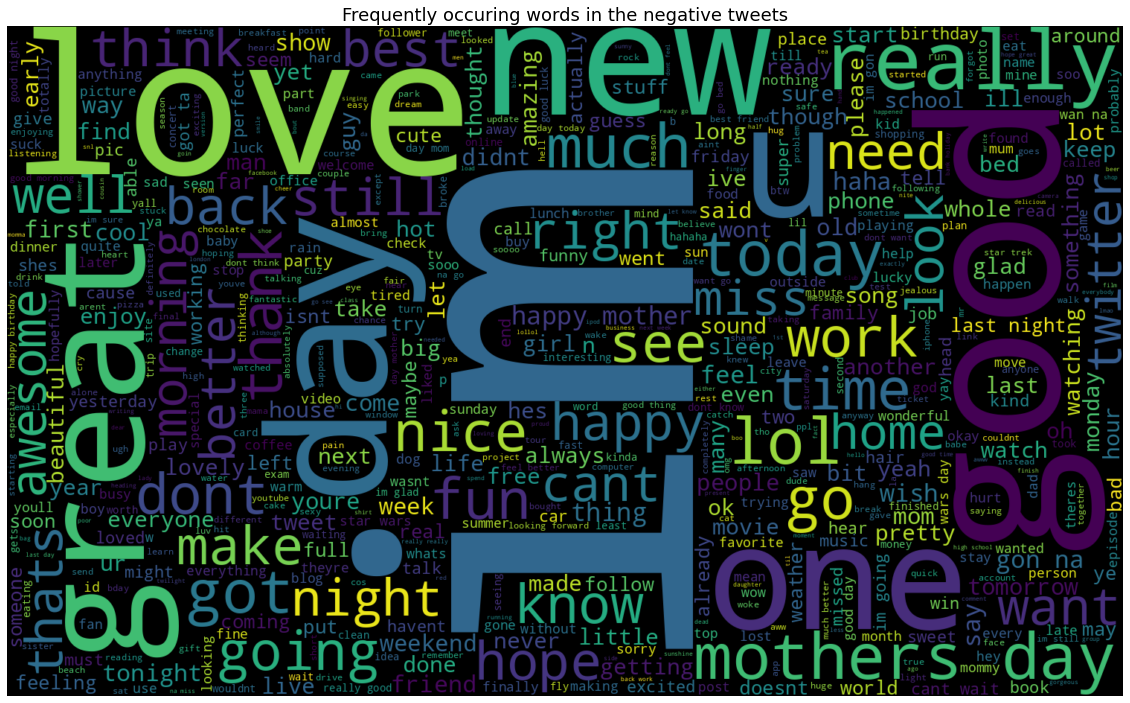

In [31]:
#creating a wordcloud for the negative tweets
text=''.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
word_cloud=WordCloud(max_words=600,width=1500,height=900).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Frequently occuring words in the negative tweets',fontsize=18)
plt.show()

In [37]:
#sorting the neutral tweets in the descending order
neutral_tweets=text_df[text_df.sentiment=='Neutral']
neg_tweets=neutral_tweets.sort_values(['polarity'],ascending='False')
neg_tweets.head()

,textID,text,polarity,sentiment
0,cb774db0d1,id responded going,0.0,Neutral
18221,0c4eac0389,found none,0.0,Neutral
18225,ad59f9f17d,oh youre gon na break wyour ups guy move,0.0,Neutral
18234,7ea0341ece,noones talking anymore,0.0,Neutral
18236,18628be7b7,sanctuarysunday yay sanctuary may watch requie...,0.0,Neutral


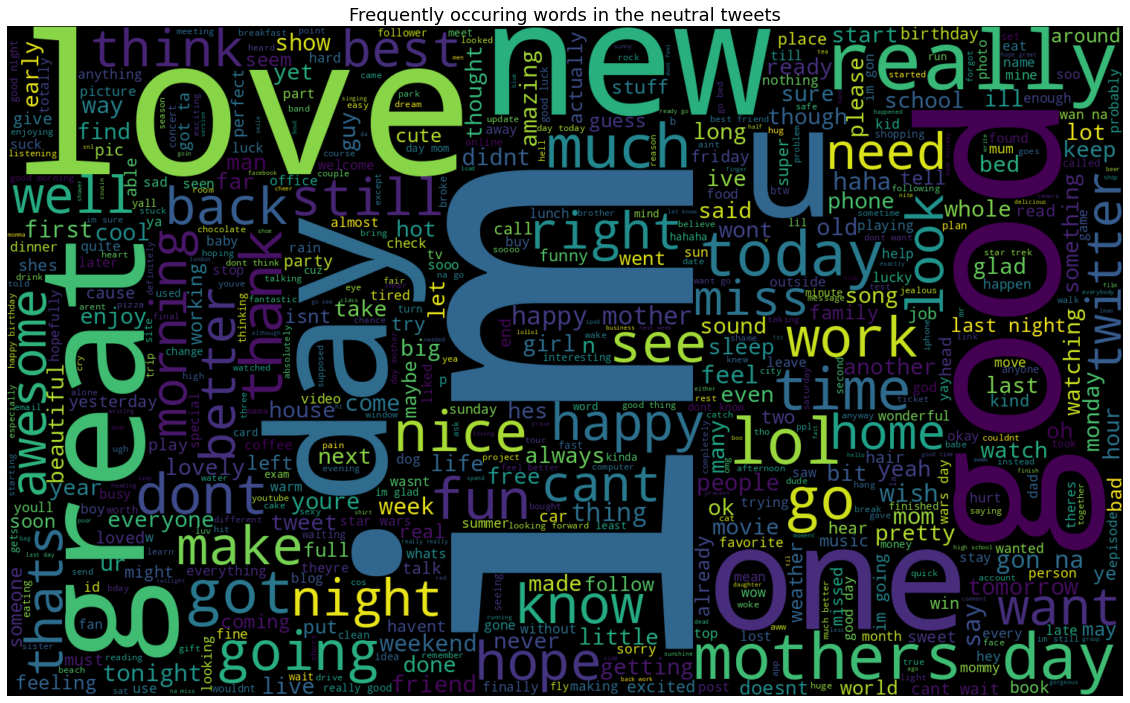

In [38]:
#creating a wordcloud for the neutral tweets
text=''.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
word_cloud=WordCloud(max_words=600,width=1500,height=900).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Frequently occuring words in the neutral tweets',fontsize=18)
plt.show()

In [39]:
#performing the vectorization
vect=CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [40]:
#printing the features obtained after vectorization
feature_names=vect.get_feature_names()
print('Total number of features:{}'.format(len(feature_names)))
print('The list of first twenty features:\n{}'.format(feature_names[:20]))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Total number of features:161248
The list of first twenty features:
['079ï½', '079ï½ cool', '07i', '07i think', '0_o', '0f', '0kenjoy', '0kenjoy dora', '0n', '0n m3', '0rpm', '0ut', '0ut take', '10000th', '10000th follower', '1000th', '1000th tweet', '1000x', '1000x better', '100msgsecond']


In [41]:
#applying vectorization
X=text_df['text']
Y=text_df['sentiment']
X=vect.transform(X)

In [42]:
#splitting the dataset into testing and training data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
#printing the size of training and testing data
print('Size of training data x:',(x_train.shape))
print('Size of training data y:',(y_train.shape))
print('Size of test data x:',(x_test.shape))
print('Size of test data y:',(y_test.shape))

Size of training data x: (21523, 161248)
Size of training data y: (21523,)
Size of test data x: (5381, 161248)
Size of test data y: (5381,)


In [44]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
#applying Logistic Regression for training the model and printing its accuracy
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_pred,y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

Test accuracy:91.80%


In [48]:
#priting the confusion matrix and classification report for the test data
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 823  139   78]
 [  20 1886   20]
 [  43  141 2231]]


              precision    recall  f1-score   support

    Negative       0.93      0.79      0.85      1040
     Neutral       0.87      0.98      0.92      1926
    Positive       0.96      0.92      0.94      2415

    accuracy                           0.92      5381
   macro avg       0.92      0.90      0.91      5381
weighted avg       0.92      0.92      0.92      5381



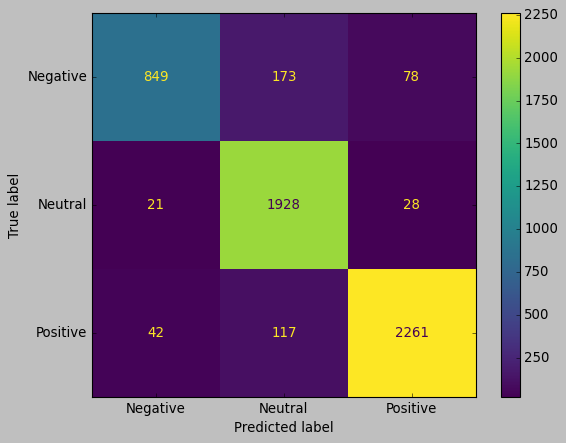

In [49]:
#plotting the confusion matrix
style.use('classic')
cm=confusion_matrix(y_test,logreg_pred,labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()

In [47]:
#applying the hypertuning parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#applying a list of parameters to the training data
param_grid={'C':[0.001,0.1,1]}
grid=GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

In [52]:
#determinng the best parameters among the values given for C
print("The best parameters are:",grid.best_params_)

The best parameters are: {'C': 1}


In [54]:
#predicting the value of test data using grid function
y_pred=grid.predict(x_test)

In [56]:
#determiing and printing the accuracy score
logreg_acc=accuracy_score(y_pred,y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

Test accuracy:91.65%


In [57]:
#printing the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 849  173   78]
 [  21 1928   28]
 [  42  117 2261]]


              precision    recall  f1-score   support

    Negative       0.93      0.77      0.84      1100
     Neutral       0.87      0.98      0.92      1977
    Positive       0.96      0.93      0.94      2420

    accuracy                           0.92      5497
   macro avg       0.92      0.89      0.90      5497
weighted avg       0.92      0.92      0.92      5497



In [66]:
#installing the required libraries for using support vector machine(SVM)
!pip install sklearn
from sklearn.svm import LinearSVC

In [67]:
#fitting the model 
!pip install scikit-learn
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [68]:
#printing the accuracy after using SVC
svc_pred=SVCmodel.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("test accuracy:{:.2f}%".format(svc_acc*100))

test accuracy:93.57%


In [69]:
#printing the confusion matrix after using SVC
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 887   90   63]
 [  20 1886   20]
 [  52  101 2262]]


              precision    recall  f1-score   support

    Negative       0.92      0.85      0.89      1040
     Neutral       0.91      0.98      0.94      1926
    Positive       0.96      0.94      0.95      2415

    accuracy                           0.94      5381
   macro avg       0.93      0.92      0.93      5381
weighted avg       0.94      0.94      0.94      5381



In [70]:
#applying hyperparameters for the SVC model
grid={
    'C':[0.01,0.1,1,2],
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[1,2,3,4],
    'gamma':[0.01,1]
}
grid=GridSearchCV(SVCmodel,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.1, 1, 2]})

In [71]:
#printing the best parameter for the SVC model
print("Best parameter:",grid.best_params_)

Best parameter: {'C': 2}


In [72]:
#predicting the value of test data using grid
y_pred=grid.predict(x_test)

In [75]:
#printing the accuracy for SVC model
logreg_acc=accuracy_score(y_pred,y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

Test accuracy:93.63%


In [76]:
#printing the confusion matrix and classification report for the SVC model
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 888   89   63]
 [  20 1886   20]
 [  54   97 2264]]


              precision    recall  f1-score   support

    Negative       0.92      0.85      0.89      1040
     Neutral       0.91      0.98      0.94      1926
    Positive       0.96      0.94      0.95      2415

    accuracy                           0.94      5381
   macro avg       0.93      0.92      0.93      5381
weighted avg       0.94      0.94      0.94      5381

